In [2]:
import pandas
import random

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

{'array1': {1, 2, 3, 4}, 'array2': {8, 5, 6, 7}}


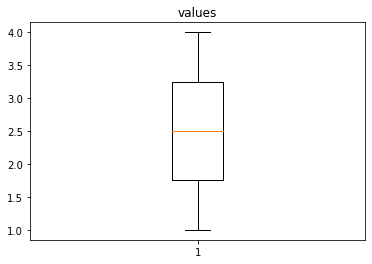

In [11]:
arr1 = {1,2,3,4}
arr2 = {5,6,7,8}
values = {"array1" : arr1, "array2" : arr2}

print(values)

plotpoints = list(values.values())[0]

plt.boxplot(plotpoints) 
plt.title("values")
plt.show()

# Part 1 - Machine Learning
You have been provided with datasets relating to the energy efficiency of buildings. Your task is to
train regression models that predict two indicators of energy efficiency based on 8 numerical inputs.

x vars represent inputs
y vars represent targets

In [8]:
# Draws a graph using the given values, labels and title parameters
def drawGraph(values, labels, title):
    plt.boxplot(values, labels=labels) 
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel("Regressor")
    plt.ylabel("Mean Squared Error")
    plt.show()

In [30]:
# Performs Regression using the implementation passed as an arugment.
def regression(regressor, *args, **kwargs):
    
    r = regressor()
    
    if "max_iter" in kwargs:
        r = regressor(max_iter=kwargs.get("max_iter"))
          
    if args:
        for i in args:
            r.fit(x_train, y_train[i])
            outputs = r.predict(x_test)
            outputs1 = r.predict(x_train)
            mae = mean_absolute_error(y_test[i], outputs)

            crossValTrain = cross_val_score(r, outputs1.reshape(-1, 1), y_train[i], scoring="neg_mean_squared_error")*-1
            crossValTest = cross_val_score(r, outputs.reshape(-1, 1), y_test[i], scoring="neg_mean_squared_error")*-1 
            
            key = type(r).__name__ + i[1]
            plotTrain[key] = crossValTrain
            plotTest[key] = crossValTest
            
            print("Implementation used: ", regressor)
            print("Mean Absolute Error: ", mae)
            print("CVS Training values: ", crossValTrain)
            print("CVS Testing values : ", crossValTest)
            print("\n")

        
    if len(args) == 0:
        r.fit(x_train, y_train)
        outputs = r.predict(x_test)
        outputs1 = r.predict(x_train)
        mae = mean_absolute_error(y_test, outputs)

        crossValTrain = cross_val_score(r, outputs1, y_train, scoring="neg_mean_squared_error")*-1
        crossValTest = cross_val_score(r, outputs, y_test, scoring="neg_mean_squared_error")*-1
        
        key = type(r).__name__
        plotTrain[key] = crossValTrain
        plotTest[key] = crossValTest

        print("Implementation used: ", regressor)
        print("Mean Absolute Error: ", mae)
        print("CVS Training values: ", crossValTrain)
        print("CVS Testing values : ", crossValTest)
        print("\n")

1. Read data from Excel using pandas library
2. Seperate data fields into inputs (X variables) and outputs(Y variables)
3. Normalise inputs and outputs using sklearn library scaler
4. Convert list to numpy array (numpy array is supposedly more efficient than lists)
5. Split data into testing and training

In [31]:
df = pandas.read_excel("ENB2012_data.xlsx", sheet_name=0)

inputs = df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
targets = df[["Y1", "Y2"]]

scaler = MinMaxScaler()
scaledInputs = np.array(scaler.fit_transform(inputs))

x_train, x_test, y_train, y_test = train_test_split(scaledInputs, targets)

Implementation used:  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Mean Absolute Error:  0.708696250000001
CVS Training values:  [0.15162676 0.22890611 0.17468574 0.19347528 0.35380089]
CVS Testing values :  [3.26920286 2.10995711 2.05559799 1.94981762 1.88356853]


Implementation used:  <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
Mean Absolute Error:  1.4900213004217673
CVS Training values:  [4.3981871  4.64376726 5.61360932 5.56241887 5.0549675 ]
CVS Testing values :  [5.99139838 7.85571329 4.7182444  6.47563318 5.82633688]


Implementation used:  <class 'sklearn.svm._classes.SVR'>
Mean Absolute Error:  1.8630104208417013
CVS Training values:  [7.68650872 6.83455124 7.52783396 9.74146744 7.08730596]
CVS Testing values :  [ 7.91406152 10.73943921  8.6125558   8.34230502  9.29585094]


Implementation used:  <class 'sklearn.svm._classes.SVR'>
Mean Absolute Error:  2.1193413369347605
CVS Training values:  [11.06512893  8.18261228  9.63487032 10.018956

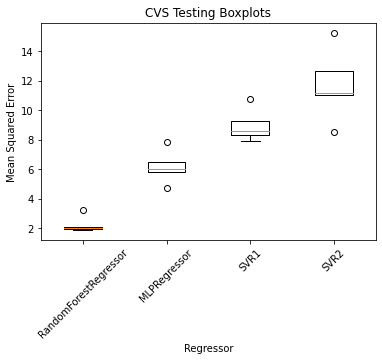

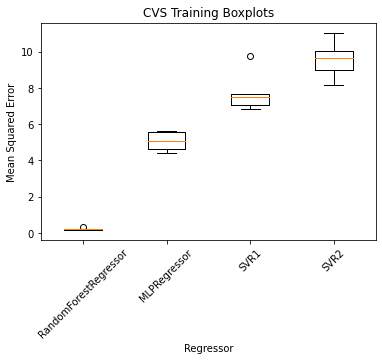

In [32]:
plotTest = {}
plotTrain = {}

regression(RandomForestRegressor)
regression(MLPRegressor, max_iter=20000)
regression(SVR, "Y1", "Y2")

drawGraph(plotTest.values(), plotTest.keys(), "CVS Testing Boxplots")
drawGraph(plotTrain.values(), plotTrain.keys(), "CVS Training Boxplots")

# Part 2 - Optimisation
The second part of this assignment requires you to implement an optimiser to solve a timetabling
problem for a university. You have been provided with a file that describes modules, and lists modules
against which they cannot be scheduled. A module consists of one lecture per week and one or more
lab sessions.


Your task is to optimise a timetable so that session is scheduled once per week in such a way that
timetable constraints are minimised. There are 20 sessions per week. You have one lecture theatre
and two labs available.

NOTE: I have interpretted the brief as a Lecture only being able to take place in a lecture theatre, and a lab as only being able to take place inside of one of the two lab rooms.

In [12]:
class Module():
    def __init__(self, code, lecturer, labs, constraints):
        self.code = code
        self.lecturer = lecturer
        self.labs = labs
        self.constraints = constraints
        
    def __str__(self):
        return str(self.__dict__)

In [13]:
def drawGraphHillclimber(*args):

    for j in range(0, len(args), 2):
        
        minimum = []
        maximum = []
        average = []
        
        mutator = args[j]
        
        for i in range(500):    
            col = mutator[:,i]

            minimum.append(min(col))
            maximum.append(max(col))
            average.append(sum(col) / len(col))

        maxName = args[j+1] + " - Maximum"
        avgName = args[j+1] + " - Average"
        minName = args[j+1] + " - Minimum"
        
        plt.plot(maximum, label = maxName)
        plt.plot(average, label = avgName)
        plt.plot(minimum, label = minName)

        plt.ylabel("Fitness Score")
        plt.xlabel("Iterations")

    plt.legend(loc="upper right")
    plt.show()

In [14]:
def hillclimber(Niter, problem, generate, mutation, comparison):
    
    
    # Generate random solution:
    parent = generate()
    parent_fitness = fitness(parent)
    
    for i in range(Niter):
        
        # Mutate
        child = mutation(parent)
        
        # Evaluate
        child_fitness = fitness(child)
        
        #
        if comparison(child_fitness, parent_fitness):
            parent = child
            parent_fitness = child_fitness
        
        best_fitnesses.append(parent_fitness)
            
    return parent, parent_fitness

In [15]:
def minimise(a, b):
    return a <= b

In [16]:
# Generate a random number between 0 and N (for sessionReplace mutator function)
def randNumGen(N):
    # Will get a random int between 0 and 19
    N = N - 1
    rand_index_1 = random.randint(0,N)

    # Keep generating a new rand int if both values are the same
    while True:
        rand_index_2 = random.randint(0,N)

        if rand_index_2 != rand_index_1:
            break
            
    return rand_index_1, rand_index_2

# Mutator 1
def sessionReplace(arr):
    
    # Note: the brief has been interpretted as lectures only being allowed to be scheduled within a Lecture Theatre
    # And likewise, labs can only be scheduled within lab rooms. Therefore, it is undesirable to replace a lecture with a lab
    
    # Choose a random number between 0 and 1 to choose whether to replace a lab or a lecture
    rand = random.randint(0,1)
    
    # N is number of sessions (20 sessions as per brief)
    N = len(arr[0])
    
    # Replace a lecture with another lecture
    if rand == 0:
        
        # Generate two random numbers that are not identical (between 0 and 19)
        rand_index_1, rand_index_2 = randNumGen(N)
        
        # i1 and i2 are the two variable values that we want to swap
        i1 = arr[0][rand_index_1]
        i2 = arr[0][rand_index_2]
        
        arr[0][rand_index_2] = i1
        arr[0][rand_index_1] = i2
        
    
    # Replace a lab with another lab
    if rand == 1:
        
        # Generate two random numbers that are not identical (between 0 and 20)
        rand_index_1, rand_index_2 = randNumGen(N)   
        
        # Get random lab room
        col_1 = random.randint(1,2)
        col_2 = random.randint(1,2)
            
        # i1 and i2 are the two variable values that we want to swap
        i1 = arr[col_1][rand_index_1]
        i2 = arr[col_2][rand_index_2]
        arr[col_2][rand_index_2] = i1
        arr[col_1][rand_index_1] = i2
        
    return arr

In [17]:
# Fitness function
def fitness(arr):
    
    c_clashes = 0
    p_clashes = 0

    # N is number of sessions (20 sessions as per brief)
    N = len(arr[0])
    
    # Concurrence checks
    for cols in range(0,N):

        current = arr[:,cols]
        
        LT = current[0]
        L1 = current[1]
        L2 = current[2]
        
        # If a lecture and a lab are both a Break slot (None) then loop
        if LT.code != None and L1.code != None or LT.code != None and L2.code != None:
        
            # Similar Lectures cannot occur at the same time as a lab
            # Similar labs cannot occur at the same time as eachother
            if LT.code == L1.code or LT.code == L2.code or L1.code == L2.code:
                c_clashes += 1
                

            # Check whether a lab occuring at the same time as a lecture has a concurrence conflict.
            for i in range(len(LT.constraints)):
                if LT.constraints[i] == L1.code or LT.constraints[i] == L2.code:
                    c_clashes += 1 
                    

            # Check whether a lab occuring at the same time as another lab has a concurrence conflict.
            for i in range(len(L1.constraints)):
                if L1.constraints[i] == L2.code:
                    c_clashes += 1
                    
    
    
    # Precedence checks 
    # Don't need to check for col = 0 because there is no precedence
    for cols in range(1, N):
        
        LT = arr[0][cols]
        
        if LT.code != None:
            precedeIndex = cols - 1
            for i in range(0, precedeIndex):

                L1 = arr[1][i]
                L2 = arr[2][i]

                if LT.code == L1.code or LT.code == L2.code:
                    p_clashes += 1
              
    # If there are no clashes for both constraints then return 0
    # If variables = 0 then this function will be exited and the code after this IF wont be run!
    if p_clashes == 0 and c_clashes == 0:
        return 0

    # Check if either but not both of the clahses = 0
    # Multiplication by 0 returns 0 and therefore the variable needs to be adjusted to 1 provide a correct result
    if p_clashes == 0:
        p_clashes = 1

    if c_clashes == 0:
        c_clashes = 1

    # Fitness is determined by 
    
    return c_clashes * p_clashes
    

In [18]:
# Print schedule
def printSchedule(arr):
    
    # N is number of sessions (20 sessions as per brief)
    N = len(arr[0])
    
    for cols in range(0,N):

        current = arr[:,cols]

        LT = current[0].code
        L1 = current[1].code
        L2 = current[2].code

        print(LT, L1, L2)

In [19]:
# Function for generating a random timetable solution
# Used to generate the initial Timetable solution but also as RUIN-AND-RECREATE mutator
def createSchedule(*args):
    
    # Creates a 2D array that fits the dimensions of the schedule.
    schedule = np.empty([3, 20], dtype=object)
    
    # N is number of sessions (20 sessions as per brief)
    N = len(schedule[0])

    # List to store ALL labs
    labs = []
        
    for i in range(len(modules)):
        # Add all lectures to  first row of 2D array
        schedule[0][i] = modules[i] 
        
        for j in range(modules[i].labs):
            # Add all labs to labs list
            labs.append(modules[i])

    # Total labs session size is N*2 (N sessions across 2 lab rooms)
    # If there are less current labs then total sessions then pad the array with None to account for unbooked rooms
    if len(labs) < N*2:
        while len(labs) < N*2:
            labs.append(None)
    
    else:
        print("There are more lab sessions than lab rooms are available")
        return
    
    # Convert list to numpy array and shuffle for random solution    
    labs = np.array(labs)
    np.random.shuffle(labs)
    
    # Store values back to 2D array containing schedule
    schedule[1] = labs[0:N]
    schedule[2] = labs[N:N*2]
    
    # Shuffle lectures for random solution
    np.random.shuffle(schedule[0])
    
    # Replace all None elements with Module objects with data set to None.
    for i in range(len(schedule)):
        for j in range(len(schedule[i])):
            if schedule[i][j] == None:
                schedule[i][j] = Module(None, None, None, [])
    
    return schedule

RUIN-AND-RECREATE FINAL SOLUTION:

MOD002 MOD009 MOD003
MOD007 MOD013 None
MOD004 MOD014 MOD009
MOD014 None MOD008
MOD015 MOD004 MOD017
MOD017 MOD015 None
MOD005 MOD010 MOD016
MOD006 MOD007 MOD003
MOD003 MOD010 None
MOD011 None MOD001
MOD001 None MOD005
MOD012 MOD006 None
None MOD002 MOD006
MOD009 MOD011 MOD012
MOD008 None MOD014
MOD013 MOD012 None
MOD016 MOD011 MOD009
None MOD015 MOD002
MOD010 MOD001 MOD006
None MOD008 MOD005
Fitness Score:  8

SESSION REPLACE FINAL SOLUTION:

MOD006 None MOD015
MOD001 MOD004 MOD013
MOD016 None MOD012
MOD002 MOD002 MOD001
MOD015 None MOD011
MOD003 MOD002 MOD009
None MOD011 MOD015
MOD005 MOD009 MOD003
MOD009 MOD010 MOD009
MOD010 MOD008 None
None MOD017 MOD007
None None MOD012
MOD004 MOD008 None
MOD011 None MOD006
MOD012 MOD005 None
MOD007 MOD016 MOD014
MOD017 MOD006 MOD005
MOD014 MOD003 MOD001
MOD013 MOD014 None
MOD008 MOD006 MOD010
Fitness Score:  9



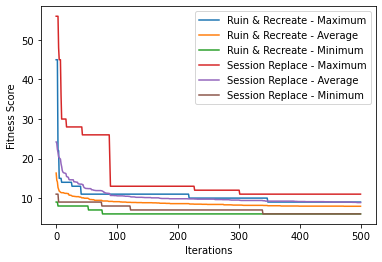

In [20]:
# Read csv into dataframe and apply columns for readability
df = pandas.read_csv("Modules.txt", sep="|", header=None)
df.columns = ["code", "lecturer", "labs", "constraints"]

# Create a list of Modules objects
modules = []
for row in df.itertuples():
    obj = Module(row.code, row.lecturer, row.labs, row.constraints)
    modules.append(obj)


# Fitness archives
ruin_recreate_fitnesses = []
session_replace_fitnesses = []
        
    
# Run RUIN-AND-RECREATE mutator 30 times for 500 iterations (gives 30 fitness lists)
for i in range(30):
    best_fitnesses = []
    best_parent, best_fitness = hillclimber(500, fitness, createSchedule, createSchedule, minimise)
    
    # Add the list with 500 fitness values to an archive
    ruin_recreate_fitnesses.append(best_fitnesses)
    
print("RUIN-AND-RECREATE FINAL SOLUTION:\n")
printSchedule(best_parent)
print("Fitness Score: ", best_fitness)
print("")




# Run SESSION REPLACE mutator 30 times for 500 iterations (gives 30 fitness lists)
for i in range(30):
    best_fitnesses = []
    best_parent, best_fitness = hillclimber(500, fitness, createSchedule, sessionReplace, minimise)
    
    # Add the list with 500 fitness values to an archive
    session_replace_fitnesses.append(best_fitnesses)
        
print("SESSION REPLACE FINAL SOLUTION:\n")
printSchedule(best_parent)
print("Fitness Score: ", best_fitness)
print("")

# Convert lists to arrays because I find them easier to work with and they are supposedly more efficient
ruin_recreate_fitnesses = np.array(ruin_recreate_fitnesses)
session_replace_fitnesses = np.array(session_replace_fitnesses)

# Call this function to plot Min, Max, and Average of each Mutator parameter
drawGraphHillclimber(ruin_recreate_fitnesses, "Ruin & Recreate", session_replace_fitnesses, "Session Replace")

# Analysis of optimiser
The Session Replace optimiser generally appears to have a higher MINIMUM fitness score overall than the Ruin And Recreate optimiser. However, the MINIMUM fitness score for both optimiser mutators is generally similar (the same). The AVERAGE fitness score of the Session Replace mutator is generally higher than the AVERAGE fitness score for the Ruin And Recreate.

As the problem that is being optimised is a minimisation problem (the lower the fitness score, the more desirable the generated solution is) it can be concluded that **the Ruin And Recreate optimiser is better** as it has lower MINIMUM and AVERAGE fitness scores.

Also, the Ruin and Recreate optimiser reaches a BETTER MINIMUM fitness score than Session Replace in fewer iterations.